___
# Ciência dos Dados - PROJETO 1

## Ester dos Santos Quintino
___

# Levantamento socioeconômico das regiões brasileiras e a utilização de tecnologia para acesso à Internet e posse de telefone móvel celular para uso pessoal dos idosos.

___
## Introdução
Este projeto pretende analisar a inclusão digital dos idosos a partir de um levantamento da evolução, ou não, do uso da tecnologia para o acesso à Internet e posse de telefone móvel celular pessoal, entre os anos de 2011 e 2015. Para tanto, será realizado uma pesquisa socieconômica nas regiões rurais e urbanas do Brasil, a fim de levantar dados que permitam validar o impacto desse período de tempo, na vida desse grupo social.




___
## Filtros da base de dados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Ester Quintino\Desktop\Projeto1CDDP


In [3]:
#Se usar o arquivo descompactado
#pd.read_csv('PES2015.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')

# Lendo a PNAD

In [4]:
dados = pd.read_csv('PES2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')
dados2011 = pd.read_csv('PES2011csv.zip', compression='zip',header=0, sep=',', quotechar='"')

Separando os estados por região:

2015

In [5]:
dados.shape
dados.loc[(dados.UF>10)&(dados.UF<20),"Regiao"] = "Norte"
dados.loc[(dados.UF>20)&(dados.UF<30),"Regiao"] = "Nordeste"
dados.loc[(dados.UF>40)&(dados.UF<44),"Regiao"] = "Sul"
dados.loc[(dados.UF>30)&(dados.UF<35),"Regiao"] = "Sudeste"
dados.loc[(dados.UF>49)&(dados.UF<54),"Regiao"] = "Centroeste"

2011

In [6]:
dados2011.shape
dados2011.loc[(dados2011.UF>10)&(dados2011.UF<20),"Regiao"] = "Norte"
dados2011.loc[(dados2011.UF>20)&(dados2011.UF<30),"Regiao"] = "Nordeste"
dados2011.loc[(dados2011.UF>40)&(dados2011.UF<44),"Regiao"] = "Sul"
dados2011.loc[(dados2011.UF>30)&(dados2011.UF<35),"Regiao"] = "Sudeste"
dados2011.loc[(dados2011.UF>49)&(dados2011.UF<54),"Regiao"] = "Centroeste"

Separando as regiões por Condição Censitária (Zona Rural e Zona Urbana):

2015

In [7]:
dados.loc[(dados.V4728>=1)&(dados.V4728<=3),"RegiãoCondiçãoCensitária"] = "Urbana"
dados.loc[(dados.V4728>3)&(dados.V4728<=8),"RegiãoCondiçãoCensitária"] = "Rural"

2011

In [8]:
dados2011.loc[(dados2011.V4728>=1)&(dados2011.V4728<=3),"RegiãoCondiçãoCensitária"] = "Urbana"
dados2011.loc[(dados2011.V4728>3)&(dados2011.V4728<=8),"RegiãoCondiçãoCensitária"] = "Rural"

Criando um filtro para rendimento mensal domiciliar em salários mínimos:
obs: Salário Mínimo atual - R$937

2015

In [9]:
dados = dados.rename(columns = {"V9532":"Renda"})
dados.loc[(dados.Renda>=1)&(dados.Renda<=(937*(1/2))),"Renda_em_Salários_Mínimos"] = "Até 1/2 salarios"
dados.loc[(dados.Renda>937)&(dados.Renda<=937*2),"Renda_em_Salários_Mínimos"] = "Entre 1 e 2 salarios"
dados.loc[(dados.Renda>937*2)&(dados.Renda<=937*3),"Renda_em_Salários_Mínimos"] = "Entre 2 e 3 salarios"
dados.loc[(dados.Renda>937*3)&(dados.Renda<=937*5),"Renda_em_Salários_Mínimos"] = "Entre 3 e 5 salarios"
dados.loc[(dados.Renda>937*5)&(dados.Renda<=937*10),"Renda_em_Salários_Mínimos"] = "Entre 5 e 10 salarios"
dados.loc[(dados.Renda>937*10),"Renda_em_Salários_Mínimos"] = "Mais que 10 salarios"


2011

In [10]:
dados2011 = dados2011.rename(columns = {"V9532":"Renda"})
dados2011.loc[(dados2011.Renda>=1)&(dados2011.Renda<=(937*(1/2))),"Renda_em_Salários_Mínimos"] = "Até 1/2 salarios"
dados2011.loc[(dados2011.Renda>937)&(dados2011.Renda<=937*2),"Renda_em_Salários_Mínimos"] = "Entre 1 e 2 salarios"
dados2011.loc[(dados2011.Renda>937*2)&(dados2011.Renda<=937*3),"Renda_em_Salários_Mínimos"] = "Entre 2 e 3 salarios"
dados2011.loc[(dados2011.Renda>937*3)&(dados2011.Renda<=937*5),"Renda_em_Salários_Mínimos"] = "Entre 3 e 5 salarios"
dados2011.loc[(dados2011.Renda>937*5)&(dados2011.Renda<=937*10),"Renda_em_Salários_Mínimos"] = "Entre 5 e 10 salarios"
dados2011.loc[(dados2011.Renda>937*10),"Renda_em_Salários_Mínimos"] = "Mais que 10 salarios"

Criando um filtro para pessoas que possuem telefone móvel celular para uso pessoal:

2015

In [11]:
dados.loc[(dados.V06112 == 1),"Tem_telefone_móvel_celular_para_uso_pessoal"] = "Sim"
dados.loc[(dados.V06112 == 3),"Tem_telefone_móvel_celular_para_uso_pessoal"] = "Não"

2011

In [12]:
dados2011.loc[(dados2011.V06112 == 1),"Tem_telefone_móvel_celular_para_uso_pessoal"] = "Sim"
dados2011.loc[(dados2011.V06112 == 3),"Tem_telefone_móvel_celular_para_uso_pessoal"] = "Não"

Criando um filtro parar pessoas que nos últimos três meses, utilizaram a Internet em algum local:

2015

In [13]:
dados.loc[(dados.V06111 == 1),"Utilizou_a_Internet_em_algum_local"] = "Sim"
dados.loc[(dados.V06111 == 3),"Utilizou_a_Internet_em_algum_local"] = "Não"

2011

In [14]:
dados2011.loc[(dados2011.V06111 == 1),"Utilizou_a_Internet_em_algum_local"] = "Sim"
dados2011.loc[(dados2011.V06111 == 3),"Utilizou_a_Internet_em_algum_local"] = "Não"

Filtrando as colunas do DataFrame:

2015

In [15]:
dados_não_nulos = dados.loc [:, ["V0401", "V8005","Renda","Renda_em_Salários_Mínimos","Tem_telefone_móvel_celular_para_uso_pessoal","Utilizou_a_Internet_em_algum_local","Regiao","RegiãoCondiçãoCensitária"]]

In [16]:
dados_não_nulos.head()

,V0401,V8005,Renda,Renda_em_Salários_Mínimos,Tem_telefone_móvel_celular_para_uso_pessoal,Utilizou_a_Internet_em_algum_local,Regiao,RegiãoCondiçãoCensitária
0,1,23,800.0,NaN,Sim,Sim,Norte,Urbana
1,1,23,1150.0,Entre 1 e 2 salarios,Sim,Sim,Norte,Urbana
2,1,35,880.0,NaN,Sim,Sim,Norte,Urbana
3,2,34,3000.0,Entre 3 e 5 salarios,Sim,Sim,Norte,Urbana
4,3,11,NaN,NaN,Sim,Sim,Norte,Urbana


2011

In [17]:
dados_não_nulos_2011 = dados2011.loc [:, ["V0401", "V8005","Renda","Renda_em_Salários_Mínimos","Tem_telefone_móvel_celular_para_uso_pessoal","Utilizou_a_Internet_em_algum_local","Regiao","RegiãoCondiçãoCensitária"]]


Renomeando algumas colunas:

2015

In [18]:
dados_não_nulos=dados_não_nulos.rename(columns={'V0401':'Condição_domiciliar','V8005':'Idade'})

In [19]:
dados_não_nulos.head()

,Condição_domiciliar,Idade,Renda,Renda_em_Salários_Mínimos,Tem_telefone_móvel_celular_para_uso_pessoal,Utilizou_a_Internet_em_algum_local,Regiao,RegiãoCondiçãoCensitária
0,1,23,800.0,NaN,Sim,Sim,Norte,Urbana
1,1,23,1150.0,Entre 1 e 2 salarios,Sim,Sim,Norte,Urbana
2,1,35,880.0,NaN,Sim,Sim,Norte,Urbana
3,2,34,3000.0,Entre 3 e 5 salarios,Sim,Sim,Norte,Urbana
4,3,11,NaN,NaN,Sim,Sim,Norte,Urbana


2011

In [20]:
dados_não_nulos_2011=dados_não_nulos_2011.rename(columns={'V0401':'Condição_domiciliar','V8005':'Idade'
                                               })

Renomeando linhas da Coluna Condição_domiciliar:

2015

In [21]:
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 1,'Condição_domiciliar'] = 'Pessoa de referência'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 2,'Condição_domiciliar'] = 'Cônjuge'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 3,'Condição_domiciliar'] = 'Filho'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 4,'Condição_domiciliar'] = 'Outro parente'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 5,'Condição_domiciliar'] = 'Agregado'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 6,'Condição_domiciliar'] = 'Pensionista'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 7,'Condição_domiciliar'] = 'Empregado doméstico'
dados_não_nulos.loc[dados_não_nulos['Condição_domiciliar'] == 8,'Condição_domiciliar'] = 'Parente do empregado doméstico'


2011

In [22]:
dados_não_nulos_2011.loc[dados_não_nulos_2011['Condição_domiciliar'] == 1,'Condição_domiciliar'] = 'Pessoa de referência'
dados_não_nulos_2011.loc[dados_não_nulos_2011['Condição_domiciliar'] == 2,'Condição_domiciliar'] = 'Cônjuge'
dados_não_nulos_2011.loc[dados_não_nulos_2011['Condição_domiciliar'] == 3,'Condição_domiciliar'] = 'Filho'
dados_não_nulos_2011.loc[dados_não_nulos_2011['Condição_domiciliar'] == 4,'Condição_domiciliar'] = 'Outro parente'
dados_não_nulos_2011.loc[dados_não_nulos_2011['Condição_domiciliar'] == 5,'Condição_domiciliar'] = 'Agregado'
dados_não_nulos_2011.loc[dados_não_nulos_2011['Condição_domiciliar'] == 6,'Condição_domiciliar'] = 'Pensionista'
dados_não_nulos_2011.loc[dados_não_nulos_2011['Condição_domiciliar'] == 7,'Condição_domiciliar'] = 'Empregado doméstico'
dados_não_nulos_2011.loc[dados_não_nulos_2011['Condição_domiciliar'] == 8,'Condição_domiciliar'] = 'Parente do empregado doméstico'


Filtrando linhas e retirando os NaNs do DataFrame:

2015

In [23]:
dados_não_nulos = dados_não_nulos[(dados_não_nulos.Condição_domiciliar == 'Pessoa de referência')&(dados_não_nulos.Idade >= 60)].dropna(axis=0)
dados_não_nulos.head()

,Condição_domiciliar,Idade,Renda,Renda_em_Salários_Mínimos,Tem_telefone_móvel_celular_para_uso_pessoal,Utilizou_a_Internet_em_algum_local,Regiao,RegiãoCondiçãoCensitária
24,Pessoa de referência,60,1700.0,Entre 1 e 2 salarios,Sim,Sim,Norte,Urbana
61,Pessoa de referência,62,1150.0,Entre 1 e 2 salarios,Sim,Não,Norte,Urbana
65,Pessoa de referência,69,3030.0,Entre 3 e 5 salarios,Não,Não,Norte,Urbana
107,Pessoa de referência,65,1700.0,Entre 1 e 2 salarios,Sim,Sim,Norte,Urbana
130,Pessoa de referência,62,1300.0,Entre 1 e 2 salarios,Sim,Não,Norte,Urbana


2011

In [24]:
dados_não_nulos_2011 = dados_não_nulos_2011[(dados_não_nulos_2011.Condição_domiciliar == 'Pessoa de referência')&(dados_não_nulos_2011.Idade >= 60)].dropna(axis=0)
dados_não_nulos_2011.head()

,Condição_domiciliar,Idade,Renda,Renda_em_Salários_Mínimos,Tem_telefone_móvel_celular_para_uso_pessoal,Utilizou_a_Internet_em_algum_local,Regiao,RegiãoCondiçãoCensitária
26,Pessoa de referência,60,1000.0,Entre 1 e 2 salarios,Sim,Não,Norte,Urbana
167,Pessoa de referência,63,3000.0,Entre 3 e 5 salarios,Não,Não,Norte,Urbana
240,Pessoa de referência,65,1000.0,Entre 1 e 2 salarios,Sim,Não,Norte,Urbana
353,Pessoa de referência,60,2500.0,Entre 2 e 3 salarios,Não,Não,Norte,Rural
354,Pessoa de referência,73,4000.0,Entre 3 e 5 salarios,Não,Não,Norte,Rural


Foi retirado os NaNs, a partir do '.dropna(axis=0)', pois como a análise é feita relacionando todas as colunas do DataFrame, se em algum momento, a pessoa entrevistada não quis se declarar ou passar informações tanto pessoais, quanto não pessoais, essa pessoa não é contabilizada na análise realizada, logo, utilizando esse comando, elimina-se a linha do DataFrame.

# Tabela Univariadas

2015

In [25]:
# Tabelas univariada
print('Frequências absolutas por Condição_domiciliar:')
ut1 = dados_não_nulos.Condição_domiciliar.value_counts(sort=False).reindex(['Pessoa de referência'])
print(ut1,'\n')

# Tabelas univariada
print('Frequências absolutas da Utilização da Internet em algum local:')
ut2_2015 = dados_não_nulos.Utilizou_a_Internet_em_algum_local.value_counts(sort=False).reindex(['Não', 'Sim'])
print(ut2_2015,'\n')

# Tabelas univariada
print('Frequências absolutas da posse ou não de Telefone móvel celular para uso pessoal:')
ut3_2015 = dados_não_nulos.Tem_telefone_móvel_celular_para_uso_pessoal.value_counts(sort=False).reindex(['Não', 'Sim'])
print(ut3_2015,'\n')

# Tabelas univariada
print('Frequências absolutas por Renda em Salários Mínimos:')
ut4_2015 = dados_não_nulos.Renda_em_Salários_Mínimos.value_counts(sort=False).reindex(['Até 1/2 salarios', 'Entre 1 e 2 salarios', 'Entre 2 e 3 salarios', 'Entre 3 e 5 salarios', 'Entre 5 e 10 salarios', 'Mais que 10 salarios'])
print(ut4_2015,'\n')

# Tabelas univariada
print('Frequências absolutas por Regiao:')
ut5_2015 = dados_não_nulos.Regiao.value_counts(sort=False).reindex(['Norte', 'Nordeste', 'Centroeste', 'Sul', 'Sudeste'])
print(ut5_2015,'\n')

Frequências absolutas por Condição_domiciliar:
Pessoa de referência    5019
Name: Condição_domiciliar, dtype: int64 

Frequências absolutas da Utilização da Internet em algum local:
Não    3313
Sim    1706
Name: Utilizou_a_Internet_em_algum_local, dtype: int64 

Frequências absolutas da posse ou não de Telefone móvel celular para uso pessoal:
Não    1028
Sim    3991
Name: Tem_telefone_móvel_celular_para_uso_pessoal, dtype: int64 

Frequências absolutas por Renda em Salários Mínimos:
Até 1/2 salarios         1258
Entre 1 e 2 salarios     1708
Entre 2 e 3 salarios      647
Entre 3 e 5 salarios      519
Entre 5 e 10 salarios     428
Mais que 10 salarios      459
Name: Renda_em_Salários_Mínimos, dtype: int64 

Frequências absolutas por Regiao:
Norte          711
Nordeste      1337
Centroeste     632
Sul           1092
Sudeste       1247
Name: Regiao, dtype: int64 



2011

In [26]:
# Tabelas univariada
print('Frequências absolutas por Condição_domiciliar:')
ut1_2011 = dados_não_nulos_2011.Condição_domiciliar.value_counts(sort=False).reindex(['Pessoa de referência'])
print(ut1_2011,'\n')

# Tabelas univariada
print('Frequências absolutas da Utilização da Internet em algum local:')
ut2_2011 = dados_não_nulos_2011.Utilizou_a_Internet_em_algum_local.value_counts(sort=False).reindex(['Não', 'Sim'])
print(ut2_2011,'\n')

# Tabelas univariada
print('Frequências absolutas da posse ou não de Telefone móvel celular para uso pessoal:')
ut3_2011 = dados_não_nulos_2011.Tem_telefone_móvel_celular_para_uso_pessoal.value_counts(sort=False).reindex(['Não', 'Sim'])
print(ut3_2011,'\n')

# Tabelas univariada
print('Frequências absolutas por Renda em Salários Mínimos:')
ut4_2011 = dados_não_nulos_2011.Renda_em_Salários_Mínimos.value_counts(sort=False).reindex(['Até 1/2 salarios', 'Entre 1 e 2 salarios', 'Entre 2 e 3 salarios', 'Entre 3 e 5 salarios', 'Entre 5 e 10 salarios', 'Mais que 10 salarios'])
print(ut4_2011,'\n')

# Tabelas univariada
print('Frequências absolutas por Regiao:')
ut5_2011 = dados_não_nulos_2011.Regiao.value_counts(sort=False).reindex(['Norte', 'Nordeste', 'Centroeste', 'Sul', 'Sudeste'])
print(ut5_2011,'\n')

Frequências absolutas por Condição_domiciliar:
Pessoa de referência    4092
Name: Condição_domiciliar, dtype: int64 

Frequências absolutas da Utilização da Internet em algum local:
Não    3121
Sim     971
Name: Utilizou_a_Internet_em_algum_local, dtype: int64 

Frequências absolutas da posse ou não de Telefone móvel celular para uso pessoal:
Não    1403
Sim    2689
Name: Tem_telefone_móvel_celular_para_uso_pessoal, dtype: int64 

Frequências absolutas por Renda em Salários Mínimos:
Até 1/2 salarios         1596
Entre 1 e 2 salarios     1066
Entre 2 e 3 salarios      395
Entre 3 e 5 salarios      304
Entre 5 e 10 salarios     251
Mais que 10 salarios      480
Name: Renda_em_Salários_Mínimos, dtype: int64 

Frequências absolutas por Regiao:
Norte          620
Nordeste      1295
Centroeste     478
Sul            800
Sudeste        899
Name: Regiao, dtype: int64 



___
## Análise e Resultados

# Relação entre Condição Domiciliar e Renda (em salários mínimos)

2015 e 2011, respectivamente.

Filtrando a Renda para uma precisão melhor na Análise

In [27]:
print("Describe da renda de 2015\n",dados_não_nulos.Renda.describe())

Describe da renda de 2015
 count    5.019000e+03
mean     3.745766e+10
std      1.898994e+11
min      8.000000e+00
25%      4.500000e+02
50%      1.500000e+03
75%      3.000000e+03
max      1.000000e+12
Name: Renda, dtype: float64


In [28]:
print("Describe da renda de 2011\n",dados_não_nulos_2011.Renda.describe())

Describe da renda de 2011
 count    4.092000e+03
mean     8.015640e+10
std      2.715684e+11
min      1.000000e+00
25%      3.000000e+02
50%      1.100000e+03
75%      3.000000e+03
max      1.000000e+12
Name: Renda, dtype: float64


Percebe-se, portanto, que existe alguns brasileiros idosos, que possuem um número elevado de renda, causando uma discrepância entre os demais. Tal fato, implica diretamente em algumas noções de probabilidade , como média e desvio padrão, fazendo com que essas medidas sejam viesadas, ou seja, não são capazes de explicar fielmente a situação desse grupo populacional. Logo, para que a compreensão seja dada de forma mais verídica possível, é necessário retirar esses indivíduos da amostra.

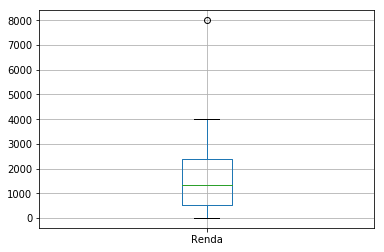

In [29]:
quantils=dados_não_nulos.Renda.quantile(np.arange(0,1,.1))
quantils.plot(kind="box",grid=True)

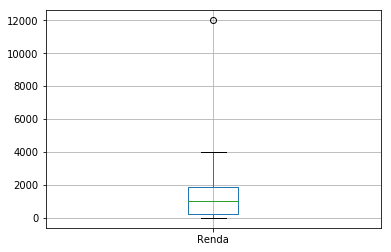

In [30]:
quantils=dados_não_nulos_2011.Renda.quantile(np.arange(0,1,.1))
quantils.plot(kind="box",grid=True)

Comparando os gráficos, é possível observar que a renda mediana aumentou em 2015. Além disso, em ambos os anos, as observações apresentaram outliers (referindo aos 10% mais ricos). Assim, a fim de ter uma análise não viesada, essa parte da amostra foi retirada dos estudos.

Para poder obter uma melhor análise, a renda foi separada em faixas proporcionais levando em conta o salário mínimo atual:

(0, 937]        27.587719
(937, 1874]     37.456140
(1874, 2811]    14.188596
(2811, 3748]     7.500000
(3748, 4685]     3.881579
(4685, 5622]     4.232456
(5622, 6559]     1.907895
(6559, 7496]     1.206140
(7496, 8433]     1.578947
(8433, 9370]     0.460526
Name: Renda, dtype: float64

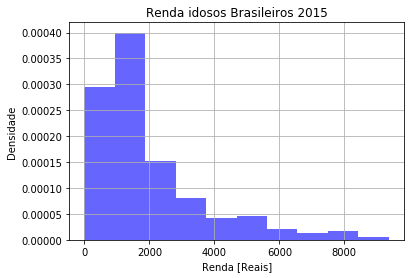

In [31]:
faixa = np.arange(0,10000,937)
salário_min = pd.cut(dados_não_nulos.Renda,faixa)
plot = dados_não_nulos.Renda.plot.hist(bins=faixa,title="Renda idosos Brasileiros 2015", normed = 1,
                                       color="blue",alpha=0.6)
plt.xlabel("Renda [Reais]")
plt.ylabel("Densidade")
plt.grid(True)
salário_min.value_counts(sort=False, normalize=True)*100

(0, 937]        27.587719
(937, 1874]     37.456140
(1874, 2811]    14.188596
(2811, 3748]     7.500000
(3748, 4685]     3.881579
(4685, 5622]     4.232456
(5622, 6559]     1.907895
(6559, 7496]     1.206140
(7496, 8433]     1.578947
(8433, 9370]     0.460526
Name: Renda, dtype: float64

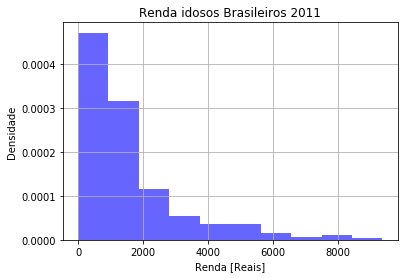

In [32]:
faixa = np.arange(0,10000,937)
salário_min_2011 = pd.cut(dados_não_nulos_2011.Renda,faixa)
plot = dados_não_nulos_2011.Renda.plot.hist(bins=faixa,title="Renda idosos Brasileiros 2011", normed = 1,
                                       color="blue",alpha=0.6)
plt.xlabel("Renda [Reais]")
plt.ylabel("Densidade")
plt.grid(True)
salário_min.value_counts(sort=False, normalize=True)*100

Nota-se que em ambos os histogramas, a concentração de renda dos idosos se localiza nas menores faixas salariais. Ademais, o pico salarial que 2011 se concentrava na faixa de até 1 salário mínimo, teve uma mudança na PNAD 2015, passando a se concentrar na segunda faixa salarial (até 2 salários mínimos), o que pode ser observado no crescimento da média salarial evidenciado nos boxplots demonstrados acima.

# Relação entre Condição Domiciliar e Utilização da internet em algum local

2015

In [33]:
ct1_2015 = pd.crosstab(dados_não_nulos.Utilizou_a_Internet_em_algum_local, dados_não_nulos.Condição_domiciliar, margins=True, rownames=['Utilizou_a_Internet_em_algum_local'])
ct1_2015 = ct1_2015.drop(['All'],axis = 1)
ct1_2015 = ct1_2015.drop(['All'])
ct1_2015

Condição_domiciliar,Pessoa de referência
Utilizou_a_Internet_em_algum_local,
Não,3313
Sim,1706


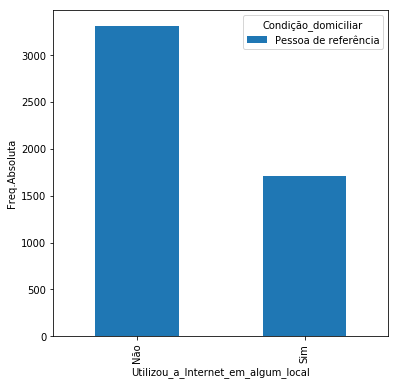

In [34]:
plot = ct1_2015.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Absoluta')
plt.show()

2011

In [35]:
ct1_2011 = pd.crosstab(dados_não_nulos_2011.Utilizou_a_Internet_em_algum_local, dados_não_nulos_2011.Condição_domiciliar, margins=True, rownames=['Utilizou_a_Internet_em_algum_local'])
ct1_2011 = ct1_2011.drop(['All'],axis = 1)
ct1_2011 = ct1_2011.drop(['All'])
ct1_2011

Condição_domiciliar,Pessoa de referência
Utilizou_a_Internet_em_algum_local,
Não,3121
Sim,971


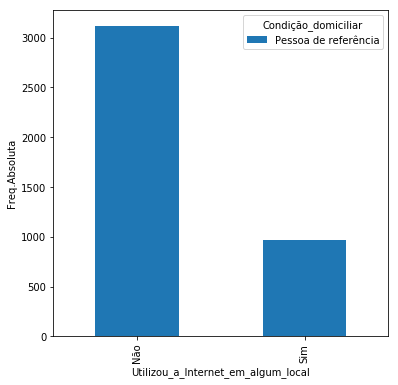

In [36]:
plot = ct1_2011.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Absoluta')
plt.show()

Embora o tamanho da amostra após os filtros aplicados seja diferente entre os anos, a proporção de indivíduos acima de 60 anos, que utilizaram internet em algum local, aumentou de 23,7% em 2011 para 33.9% em 2015. Tal fato, muito provavelmente, seja efeito da maior acessibilidade e expansão da Internet ao longo dos anos.


# Relação entre Condição Domiciliar e Posse de Telefone celular para uso próprio

2015

In [37]:
ct2_2015=pd.crosstab(dados_não_nulos.Tem_telefone_móvel_celular_para_uso_pessoal, dados_não_nulos.Condição_domiciliar, margins=True, rownames=['Tem_telefone_móvel_celular_para_uso_pessoal'])
ct2_2015 = ct2_2015.drop(['All'],axis = 1)
ct2_2015 = ct2_2015.drop(['All'])
ct2_2015

Condição_domiciliar,Pessoa de referência
Tem_telefone_móvel_celular_para_uso_pessoal,
Não,1028
Sim,3991


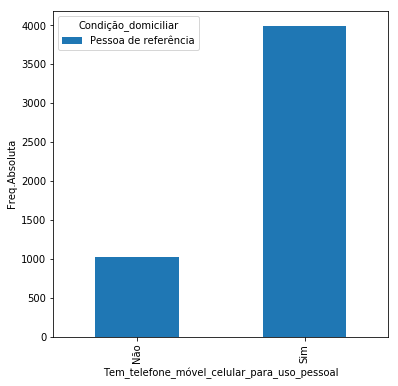

In [38]:
plot = ct2_2015.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Absoluta')
plt.show()

2011

In [39]:
ct2_2011=pd.crosstab(dados_não_nulos_2011.Tem_telefone_móvel_celular_para_uso_pessoal, dados_não_nulos_2011.Condição_domiciliar, margins=True, rownames=['Tem_telefone_móvel_celular_para_uso_pessoal'])
ct2_2011 = ct2_2011.drop(['All'],axis = 1)
ct2_2011 = ct2_2011.drop(['All'])
ct2_2011

Condição_domiciliar,Pessoa de referência
Tem_telefone_móvel_celular_para_uso_pessoal,
Não,1403
Sim,2689


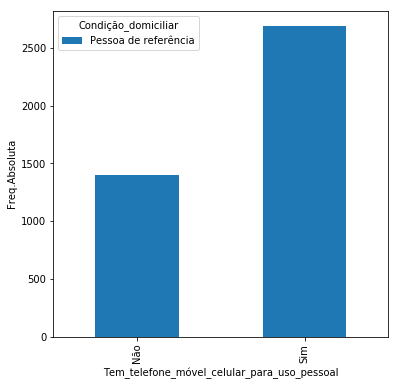

In [40]:
plot = ct2_2011.plot(kind='bar',figsize=(6, 6))
plt.ylabel('Freq.Absoluta')
plt.show()

Embora o tamanho da amostra após os filtros aplicados seja diferente entre os anos, a proporção de indivíduos acima de 60 anos, que tem telefone móvel celular para uso pessoal, aumentou de 65,71% em 2011 para 79.5% em 2015. 

# Comparação entre renda (em salários mínimos) com a Utilização de Internet em algum local

2015

In [41]:
salário_min.value_counts()
sal_Utilizou_a_Internet_em_algum_local=pd.crosstab(dados_não_nulos["Utilizou_a_Internet_em_algum_local"],salário_min,normalize = True)
alfa=sal_Utilizou_a_Internet_em_algum_local.sum().sum()
sal_Utilizou_a_Internet_em_algum_local*100/alfa



Renda,"(0, 937]","(937, 1874]","(1874, 2811]","(2811, 3748]","(3748, 4685]","(4685, 5622]","(5622, 6559]","(6559, 7496]","(7496, 8433]","(8433, 9370]"
Utilizou_a_Internet_em_algum_local,,,,,,,,,,
Não,25.701754,27.807018,8.333333,3.486842,1.271930,1.271930,0.460526,0.197368,0.372807,0.087719
Sim,1.885965,9.649123,5.855263,4.013158,2.609649,2.960526,1.447368,1.008772,1.206140,0.372807


A porcentagem de brasileiros que Utilizou a Internet em algum local é de:  66.00916517234509 %


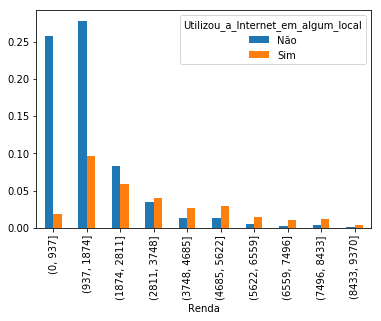

In [42]:
sal_Utilizou_a_Internet_em_algum_local=pd.crosstab(salário_min,dados_não_nulos["Utilizou_a_Internet_em_algum_local"],normalize = True)
sal_Utilizou_a_Internet_em_algum_local.plot(kind="bar")

x=dados_não_nulos["Utilizou_a_Internet_em_algum_local"].value_counts()
alfa=x.sum()
print("A porcentagem de brasileiros que Utilizou a Internet em algum local é de: ",(100*x[0]/x.sum()),"%")

2011

In [43]:
salário_min_2011.value_counts()
sal_Utilizou_a_Internet_em_algum_local_2011=pd.crosstab(dados_não_nulos_2011["Utilizou_a_Internet_em_algum_local"],salário_min_2011,normalize = True)
alfa_2011=sal_Utilizou_a_Internet_em_algum_local_2011.sum().sum()
sal_Utilizou_a_Internet_em_algum_local_2011*100/alfa_2011



Renda,"(0, 937]","(937, 1874]","(1874, 2811]","(2811, 3748]","(3748, 4685]","(4685, 5622]","(5622, 6559]","(6559, 7496]","(7496, 8433]","(8433, 9370]"
Utilizou_a_Internet_em_algum_local,,,,,,,,,,
Não,43.023256,23.781838,6.727575,2.187154,1.301218,1.162791,0.636766,0.138427,0.332226,0.055371
Sim,1.162791,5.730897,4.208195,2.906977,2.021041,2.187154,0.858250,0.526024,0.775194,0.276855


A porcentagem de brasileiros que Utilizou a Internet em algum local é de:  80.96285434995113 %


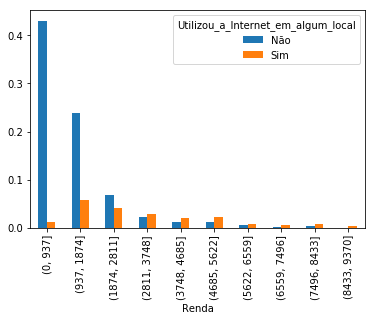

In [44]:
sal_Utilizou_a_Internet_em_algum_local_2011=pd.crosstab(salário_min_2011,dados_não_nulos_2011["Utilizou_a_Internet_em_algum_local"],normalize = True)
sal_Utilizou_a_Internet_em_algum_local_2011.plot(kind="bar")

x_2011=dados_não_nulos_2011["Utilizou_a_Internet_em_algum_local"].value_counts()
alfa_2011=x_2011.sum()
print("A porcentagem de brasileiros que Utilizou a Internet em algum local é de: ",(100*x[0]/x_2011.sum()),"%")

É possível observar nos dois anos analisados que a renda tem impacto positivo no acesso a internet , uma vez que a partir da quarta faixa salarial, o número de indivíduos que afirmam ter tido acesso a internet em algum local, ultrapassa os do que não tiveram. Além disso, para os dois anos, essa taxa de crescimento aumentou fortemente nos níveis de rendas mais altos.

# Comparação entre renda (em salários mínimos) com posse de Telefone móvel celular para uso pessoal

2015

In [45]:
salário_min.value_counts()
sal_Tem_telefone_móvel_celular_para_uso_pessoal=pd.crosstab(dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"],salário_min,normalize = True)
b=sal_Tem_telefone_móvel_celular_para_uso_pessoal.sum().sum()
sal_Tem_telefone_móvel_celular_para_uso_pessoal*100/b

Renda,"(0, 937]","(937, 1874]","(1874, 2811]","(2811, 3748]","(3748, 4685]","(4685, 5622]","(5622, 6559]","(6559, 7496]","(7496, 8433]","(8433, 9370]"
Tem_telefone_móvel_celular_para_uso_pessoal,,,,,,,,,,
Não,11.754386,6.25000,1.535088,0.723684,0.197368,0.241228,0.043860,0.043860,0.043860,0.043860
Sim,15.833333,31.20614,12.653509,6.776316,3.684211,3.991228,1.864035,1.162281,1.535088,0.416667


A porcentagem de brasileiros que Tem telefone móvel celular para uso pessoal é de:  79.51783223749752 %


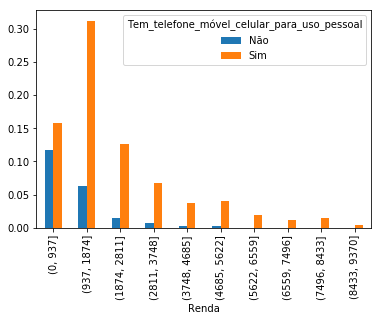

In [46]:
sal_Tem_telefone_móvel_celular_para_uso_pessoal=pd.crosstab(salário_min,dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"],normalize = True)
sal_Tem_telefone_móvel_celular_para_uso_pessoal.plot(kind="bar")

x=dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"].value_counts()
b=x.sum()
print("A porcentagem de brasileiros que Tem telefone móvel celular para uso pessoal é de: ",(100*x[0]/x.sum()),"%")

2011

In [47]:
salário_min_2011.value_counts()
sal_Tem_telefone_móvel_celular_para_uso_pessoal_2011=pd.crosstab(dados_não_nulos_2011["Tem_telefone_móvel_celular_para_uso_pessoal"],salário_min_2011,normalize = True)
b_2011=sal_Tem_telefone_móvel_celular_para_uso_pessoal_2011.sum().sum()
sal_Tem_telefone_móvel_celular_para_uso_pessoal_2011*100/b_2011

Renda,"(0, 937]","(937, 1874]","(1874, 2811]","(2811, 3748]","(3748, 4685]","(4685, 5622]","(5622, 6559]","(6559, 7496]","(7496, 8433]","(8433, 9370]"
Tem_telefone_móvel_celular_para_uso_pessoal,,,,,,,,,,
Não,25.055371,6.976744,1.910299,0.609081,0.387597,0.221484,0.193798,0.055371,0.110742,0.027685
Sim,19.130676,22.535991,9.025471,4.485050,2.934662,3.128461,1.301218,0.609081,0.996678,0.304540


A porcentagem de brasileiros que Tem telefone móvel celular para uso pessoal é de:  97.53176930596285 %


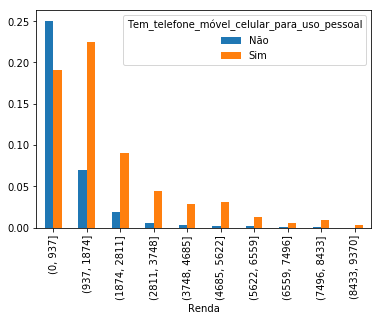

In [48]:
sal_Tem_telefone_móvel_celular_para_uso_pessoal_2011=pd.crosstab(salário_min_2011,dados_não_nulos_2011["Tem_telefone_móvel_celular_para_uso_pessoal"],normalize = True)
sal_Tem_telefone_móvel_celular_para_uso_pessoal_2011.plot(kind="bar")

x_2011=dados_não_nulos_2011["Tem_telefone_móvel_celular_para_uso_pessoal"].value_counts()
b_2011=x_2011.sum()
print("A porcentagem de brasileiros que Tem telefone móvel celular para uso pessoal é de: ",(100*x[0]/x_2011.sum()),"%")

Percebe-se, que em 2011, a renda era um potencializador para que as pessoas idosas tenham acesso à aquisição de telefone móvel para uso pessoal. Ao analisar a tabela, é possível observar que a partir do segundo nível de renda, o número de indivíduos com telefone móvel era superior àqueles que não tinham. Entretanto, em 2015, esse valor já ultrapassava a primeira faixa de renda. 

Possivelmente, a renda não tem impacto tão significativo na aquisição de telefones móveis devido a massificação do celular e a diferentes modelos, com custos mais acessíveis. Segundo estudos do IBGE noticiados pela Agência Brasil, o número de pessoas com celular aumentou 147% no comparativo entre 2005 e 2015, revelando que esse processo de expansão dos telefones móveis, já é característico antes da data de análise desse estudo.

Abaixo segue-se o link da notícia:
https://www.google.com.br/amp/agenciabrasil.ebc.com.br/amphtml/geral/noticia/2016-12/numero-de-pessoas-que-tem-celular-aumenta-147-em-10-anos-diz-ibge

# Comparando a utilização da internet em algum local com Condição Censitária

2015

Text(0.5,1,'Urbana - Utilizou_a_Internet_em_algum_local')

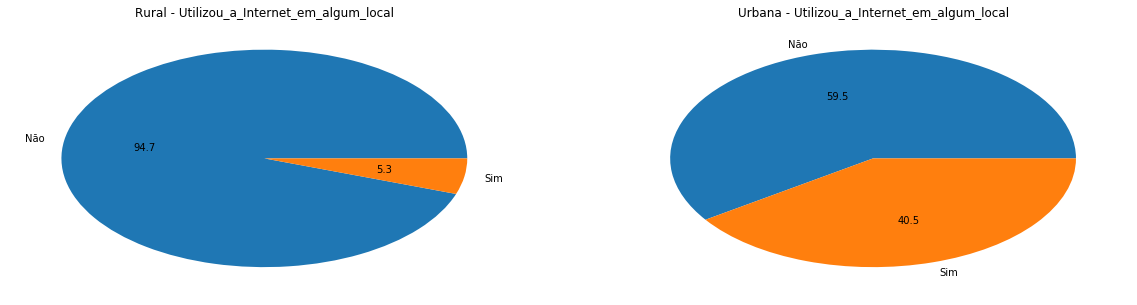

In [49]:
Utilizou_a_Internet_em_algum_local_rural=(dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Rural"].value_counts()

f, axarr = plt.subplots(1,2,figsize=(20,5))
axarr[0].pie(Utilizou_a_Internet_em_algum_local_rural,autopct="%0.1f",labels=Utilizou_a_Internet_em_algum_local_rural.index)
axarr[0].set_title('Rural - Utilizou_a_Internet_em_algum_local')

Utilizou_a_Internet_em_algum_local_urbana=(dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Urbana"].value_counts()

axarr[1].pie(Utilizou_a_Internet_em_algum_local_urbana,autopct="%0.1f",labels=Utilizou_a_Internet_em_algum_local_urbana.index)
axarr[1].set_title('Urbana - Utilizou_a_Internet_em_algum_local')



2011

Text(0.5,1,'Urbana - Utilizou_a_Internet_em_algum_local')

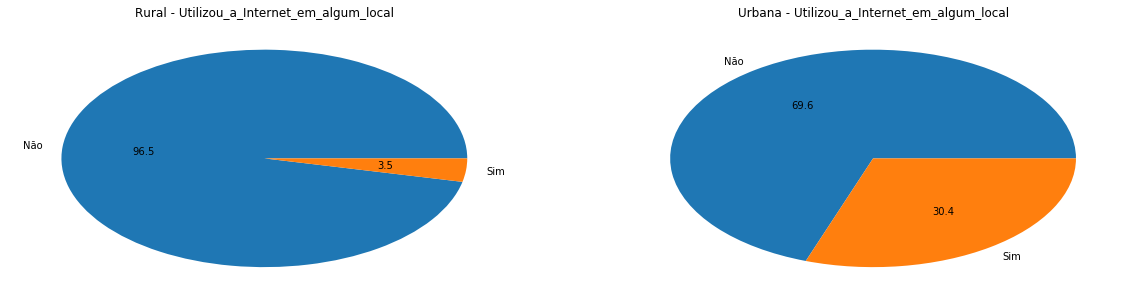

In [50]:
Utilizou_a_Internet_em_algum_local_rural_2011=(dados_não_nulos_2011["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos_2011.RegiãoCondiçãoCensitária=="Rural"].value_counts()

f, axarr = plt.subplots(1,2,figsize=(20,5))
axarr[0].pie(Utilizou_a_Internet_em_algum_local_rural_2011,autopct="%0.1f",labels=Utilizou_a_Internet_em_algum_local_rural_2011.index)
axarr[0].set_title('Rural - Utilizou_a_Internet_em_algum_local')

Utilizou_a_Internet_em_algum_local_urbana_2011=(dados_não_nulos_2011["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos_2011.RegiãoCondiçãoCensitária=="Urbana"].value_counts()

axarr[1].pie(Utilizou_a_Internet_em_algum_local_urbana_2011,autopct="%0.1f",labels=Utilizou_a_Internet_em_algum_local_urbana_2011.index)
axarr[1].set_title('Urbana - Utilizou_a_Internet_em_algum_local')



Nota-se que a utilização da internet aumentou tanto na zona rural, quanto na urbana, no comparativo entre 2011 e 2015.

# Comparando a posse de Telefone móvel celular para uso pessoal com a Condição Censitária

2015

Text(0.5,1,'Urbana - Tem_telefone_móvel_celular_para_uso_pessoal')

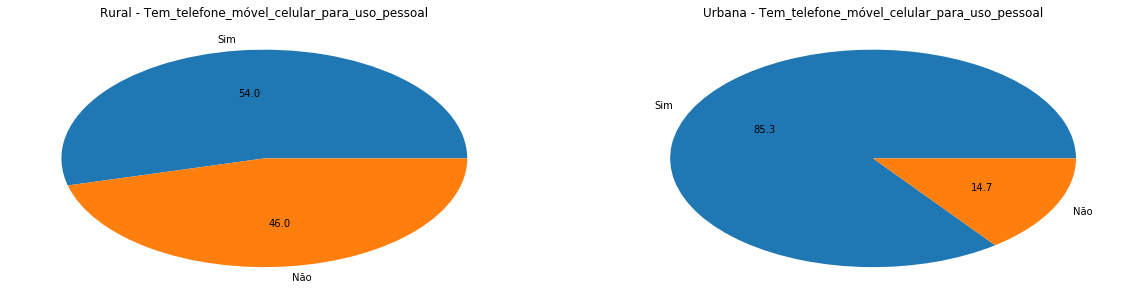

In [51]:
Tem_telefone_móvel_celular_para_uso_pessoal_rural=(dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Rural"].value_counts()

f, axarr = plt.subplots(1,2,figsize=(20,5))
axarr[0].pie(Tem_telefone_móvel_celular_para_uso_pessoal_rural,autopct="%0.1f",labels=Tem_telefone_móvel_celular_para_uso_pessoal_rural.index)
axarr[0].set_title('Rural - Tem_telefone_móvel_celular_para_uso_pessoal')

Tem_telefone_móvel_celular_para_uso_pessoal_urbana=(dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Urbana"].value_counts()

axarr[1].pie(Tem_telefone_móvel_celular_para_uso_pessoal_urbana,autopct="%0.1f",labels=Tem_telefone_móvel_celular_para_uso_pessoal_urbana.index)
axarr[1].set_title('Urbana - Tem_telefone_móvel_celular_para_uso_pessoal')


2011

Text(0.5,1,'Urbana - Tem_telefone_móvel_celular_para_uso_pessoal')

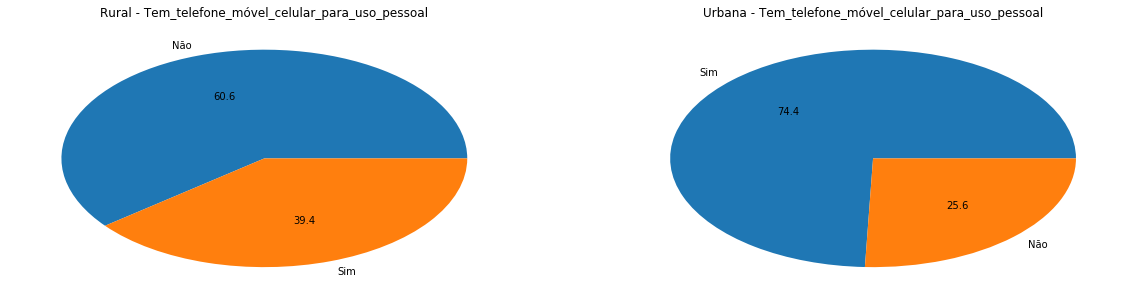

In [52]:
Tem_telefone_móvel_celular_para_uso_pessoal_rural_2011=(dados_não_nulos_2011["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos_2011.RegiãoCondiçãoCensitária=="Rural"].value_counts()

f, axarr = plt.subplots(1,2,figsize=(20,5))
axarr[0].pie(Tem_telefone_móvel_celular_para_uso_pessoal_rural_2011,autopct="%0.1f",labels=Tem_telefone_móvel_celular_para_uso_pessoal_rural_2011.index)
axarr[0].set_title('Rural - Tem_telefone_móvel_celular_para_uso_pessoal')

Tem_telefone_móvel_celular_para_uso_pessoal_urbana_2011=(dados_não_nulos_2011["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos_2011.RegiãoCondiçãoCensitária=="Urbana"].value_counts()

axarr[1].pie(Tem_telefone_móvel_celular_para_uso_pessoal_urbana_2011,autopct="%0.1f",labels=Tem_telefone_móvel_celular_para_uso_pessoal_urbana_2011.index)
axarr[1].set_title('Urbana - Tem_telefone_móvel_celular_para_uso_pessoal')


Nota-se que à aquisição de telefone móvel celular para uso pessoal, aumentou tanto na zona rural, quanto na urbana, no comparativo entre 2011 e 2015.

# Comparando Renda (em salários mínimos) com Região:

2015

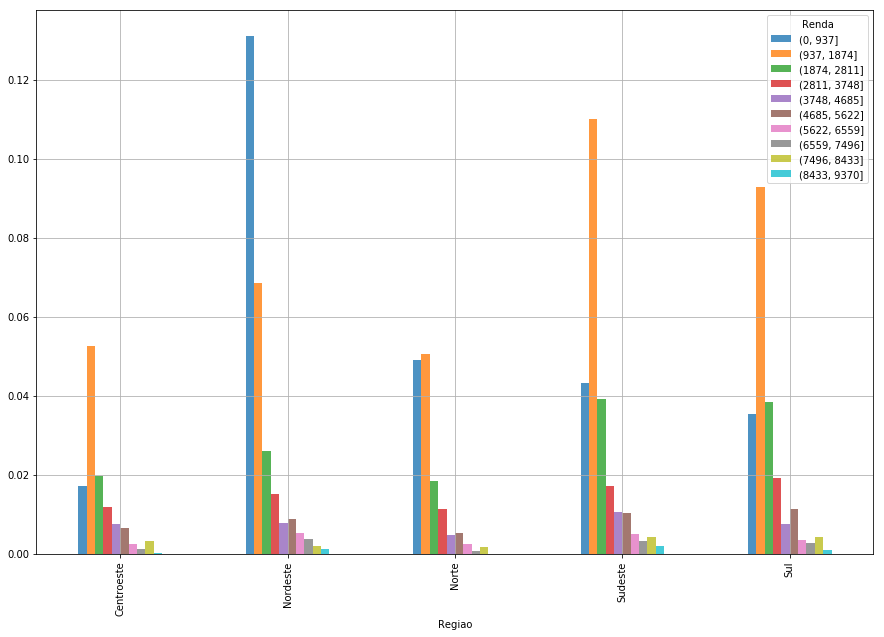

In [53]:
salário_min.value_counts()
sal_Regiao=pd.crosstab(dados_não_nulos["Regiao"],salário_min,normalize = True)
sal_Regiao.plot(kind="bar",figsize=(15,10),alpha=0.8, grid= True)

2011

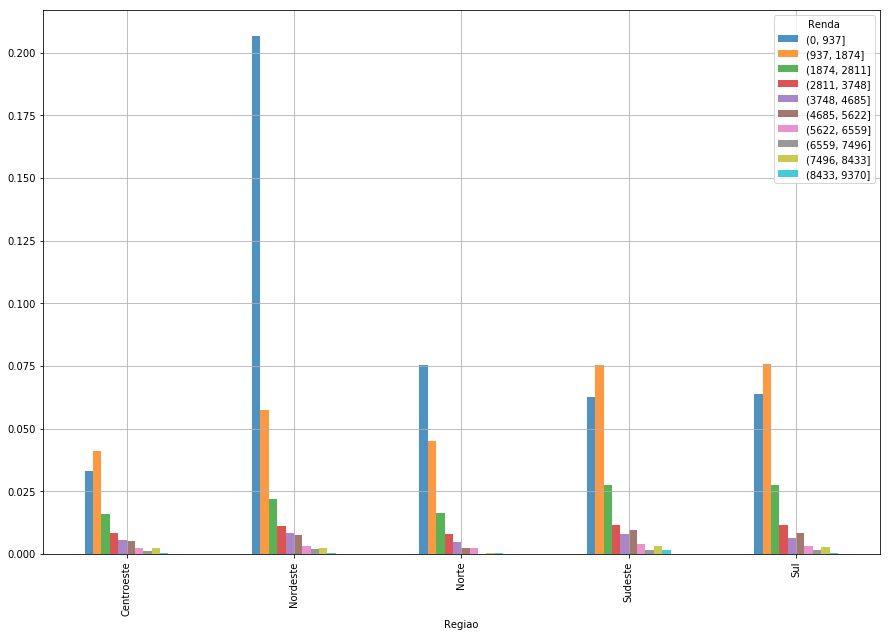

In [54]:
salário_min_2011.value_counts()
sal_Regiao_2011=pd.crosstab(dados_não_nulos_2011["Regiao"],salário_min_2011,normalize = True)
sal_Regiao_2011.plot(kind="bar",figsize=(15,10),alpha=0.8, grid= True)

Fazendo um comparativo de renda por região, nota-se que as distribuição das faixas, não se alterou de forma relevante entre os anos. Além disso, no Nordeste, a primeira faixa salarial, tem uma concentração maior de indivíduos que as demais regiões.

# Comparando Renda com a Condição Censitária

# Análise na Zona Rural

2015

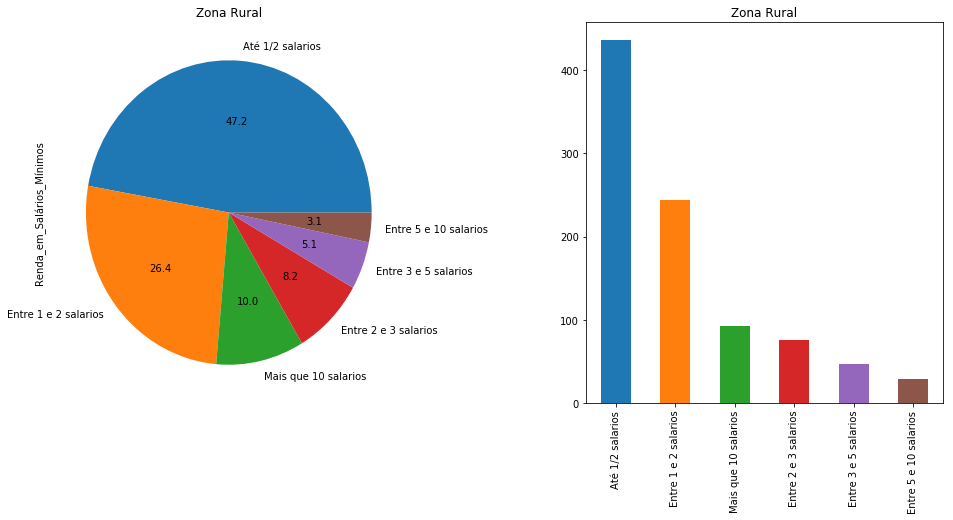

In [55]:
Renda_rural=(dados_não_nulos["Renda_em_Salários_Mínimos"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Rural"].value_counts()
fig = plt.figure(figsize=(16,7))

plt.subplot(122)
plot=Renda_rural.plot(kind="bar", title= "Zona Rural")

plt.subplot(121)
plot=Renda_rural.plot(kind="pie",autopct="%0.1f", title= "Zona Rural")

fig.subplots_adjust(wspace=.5)
plt.show()

2011

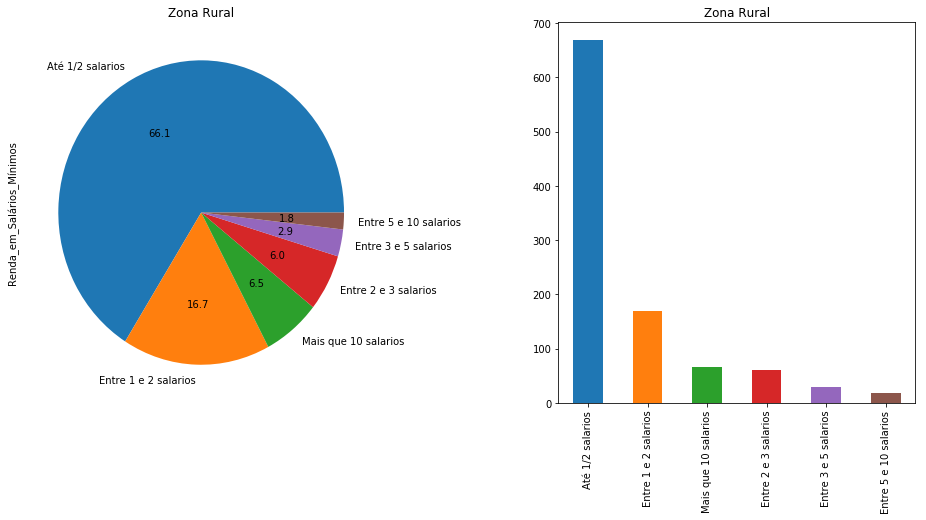

In [56]:
Renda_rural_2011=(dados_não_nulos_2011["Renda_em_Salários_Mínimos"])[dados_não_nulos_2011.RegiãoCondiçãoCensitária=="Rural"].value_counts()
fig = plt.figure(figsize=(16,7))

plt.subplot(122)
plot=Renda_rural_2011.plot(kind="bar", title= "Zona Rural")

plt.subplot(121)
plot=Renda_rural_2011.plot(kind="pie",autopct="%0.1f", title= "Zona Rural")

fig.subplots_adjust(wspace=.5)
plt.show()

Em 2015 a faixa de renda até 1 salário mínimo, foi menor que 2011 na zona Rural.

# Análise na Zona Urbana

2015

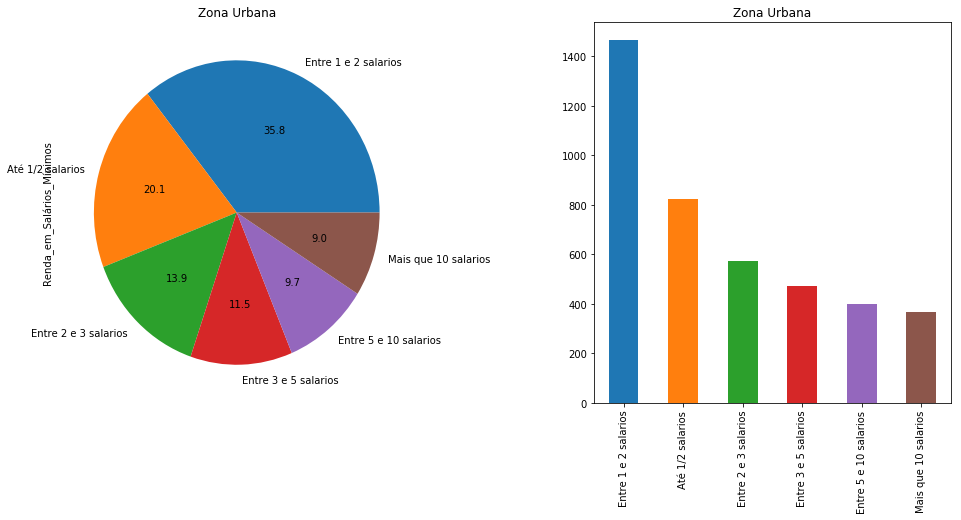

In [57]:
Renda_urbana=(dados_não_nulos["Renda_em_Salários_Mínimos"])[dados_não_nulos.RegiãoCondiçãoCensitária=="Urbana"].value_counts()
fig = plt.figure(figsize=(16,7))

plt.subplot(122)
plot=Renda_urbana.plot(kind="bar", title= "Zona Urbana")

plt.subplot(121)
plot=Renda_urbana.plot(kind="pie",autopct="%0.1f", title= "Zona Urbana")

fig.subplots_adjust(wspace=.5)
plt.show()

2011

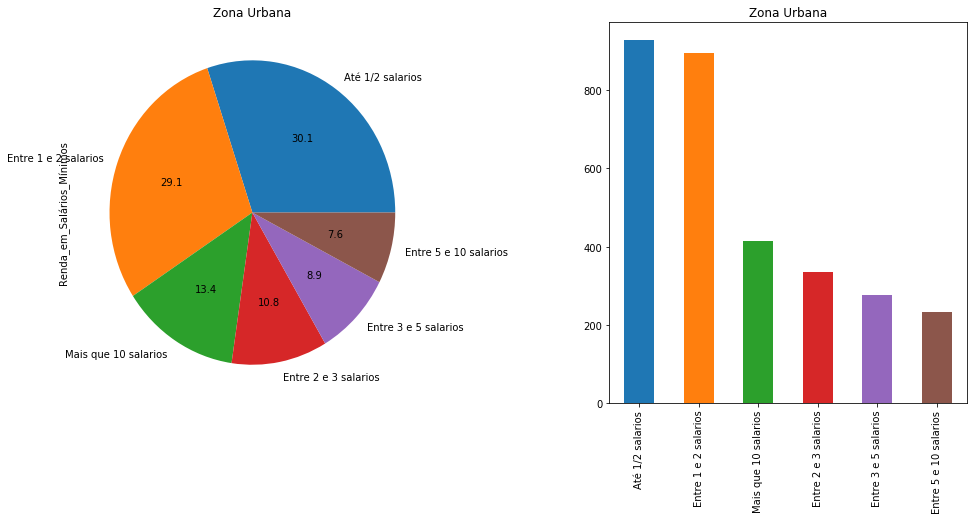

In [58]:
Renda_urbana_2011=(dados_não_nulos_2011["Renda_em_Salários_Mínimos"])[dados_não_nulos_2011.RegiãoCondiçãoCensitária=="Urbana"].value_counts()
fig = plt.figure(figsize=(16,7))

plt.subplot(122)
plot=Renda_urbana_2011.plot(kind="bar", title= "Zona Urbana")

plt.subplot(121)
plot=Renda_urbana_2011.plot(kind="pie",autopct="%0.1f", title= "Zona Urbana")

fig.subplots_adjust(wspace=.5)
plt.show()

Em Zona Urabana, nota-se maior distribuição das faixas salariais, em relação ao gráfico da Rural plotado acima. 

# Região Norte:

# Relação da Região Norte com o Uso da Internet em algum Local e posse de Telefone móvel celular para uso pessoal

2015

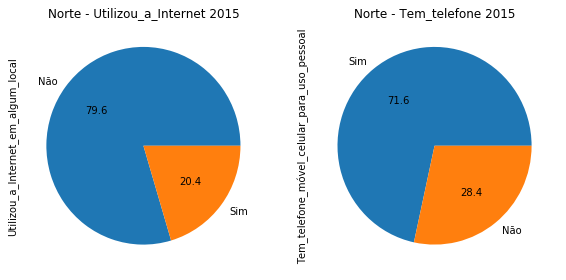

In [59]:
Região_Norte_2015=dados_não_nulos[dados_não_nulos.Regiao=="Norte"]
Utilizou_a_Internet_em_algum_local_Região_Norte= (dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.Regiao=="Norte"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Norte= (dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.Regiao=="Norte"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Norte.plot(kind="pie", autopct="%0.1f",title= 'Norte - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Norte.plot(kind="pie",autopct="%0.1f", title= 'Norte - Tem_telefone 2015')

plt.show()

2011

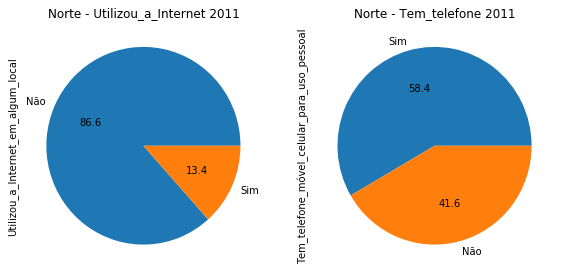

In [60]:
Região_Norte_2011=dados_não_nulos_2011[dados_não_nulos_2011.Regiao=="Norte"]
Utilizou_a_Internet_em_algum_local_Região_Norte_2011= (dados_não_nulos_2011["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos_2011.Regiao=="Norte"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Norte_2011= (dados_não_nulos_2011["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos_2011.Regiao=="Norte"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Norte_2011.plot(kind="pie", autopct="%0.1f",title= 'Norte - Utilizou_a_Internet 2011')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Norte_2011.plot(kind="pie",autopct="%0.1f", title= 'Norte - Tem_telefone 2011')

plt.show()

Na região Norte , tanto o uso de internet em algum local, quanto a posse de telefone , aumentou , entre 2015 e 2011.

# Relação da Região Norte com Renda

2015

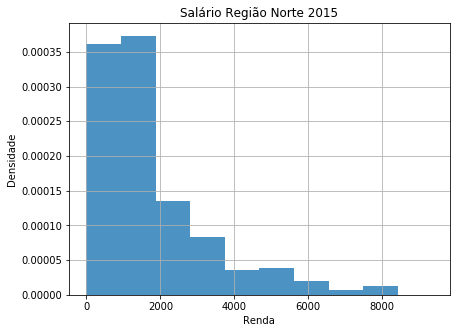

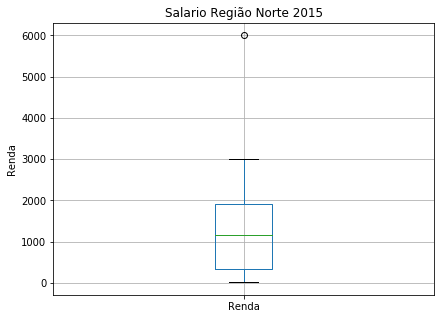

In [61]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Norte_2015.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Norte 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Norte_2015 = Região_Norte_2015.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Norte_2015.plot(kind="box",grid=True)
plt.title("Salario Região Norte 2015")
plt.ylabel("Renda")

plt.show()

2011

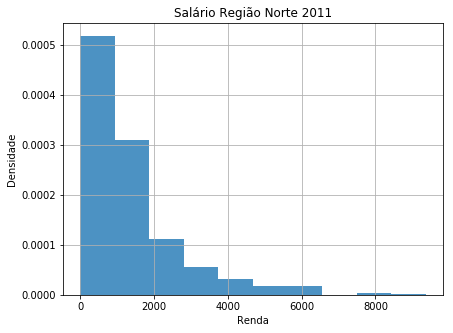

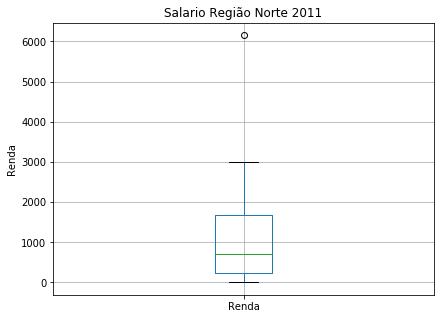

In [62]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Norte_2011.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Norte 2011")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Norte_2011 = Região_Norte_2011.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Norte_2011.plot(kind="box",grid=True)
plt.title("Salario Região Norte 2011")
plt.ylabel("Renda")

plt.show()

O salário mediano na região Norte, aumentou entre os anos.

# Região Nordeste:

# Relação da Região Nordeste com o Uso da Internet em algum Local e posse de Telefone móvel celular para uso pessoal

2015

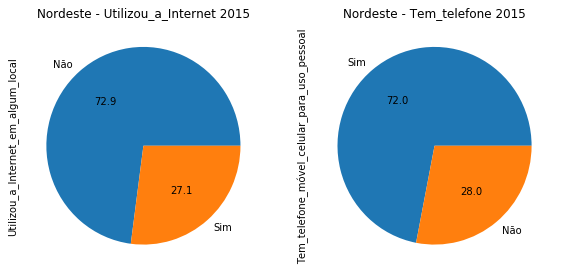

In [63]:
Região_Nordeste_2015=dados_não_nulos[dados_não_nulos.Regiao=="Nordeste"]
Utilizou_a_Internet_em_algum_local_Região_Nordeste= (dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.Regiao=="Nordeste"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Nordeste= (dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.Regiao=="Nordeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(243)
plot=Utilizou_a_Internet_em_algum_local_Região_Nordeste.plot(kind="pie", autopct="%0.1f",title= 'Nordeste - Utilizou_a_Internet 2015')

plt.subplot(244)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Nordeste.plot(kind="pie",autopct="%0.1f", title= 'Nordeste - Tem_telefone 2015')

plt.show()

2011

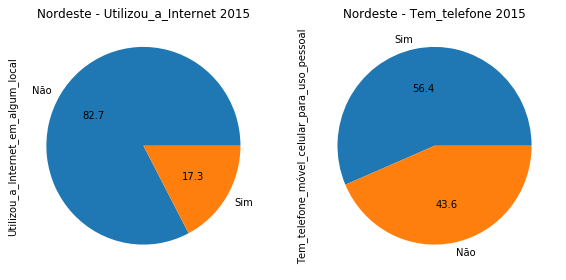

In [64]:
Região_Nordeste_2011=dados_não_nulos_2011[dados_não_nulos_2011.Regiao=="Nordeste"]
Utilizou_a_Internet_em_algum_local_Região_Nordeste_2011= (dados_não_nulos_2011["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos_2011.Regiao=="Nordeste"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Nordeste_2011= (dados_não_nulos_2011["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos_2011.Regiao=="Nordeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(243)
plot=Utilizou_a_Internet_em_algum_local_Região_Nordeste_2011.plot(kind="pie", autopct="%0.1f",title= 'Nordeste - Utilizou_a_Internet 2015')

plt.subplot(244)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Nordeste_2011.plot(kind="pie",autopct="%0.1f", title= 'Nordeste - Tem_telefone 2015')

plt.show()

Na região Nordeste , tanto o uso de internet em algum local, quanto a posse de telefone , aumentou , entre 2015 e 2011.

# Relação da Região Nordeste com Renda

2015

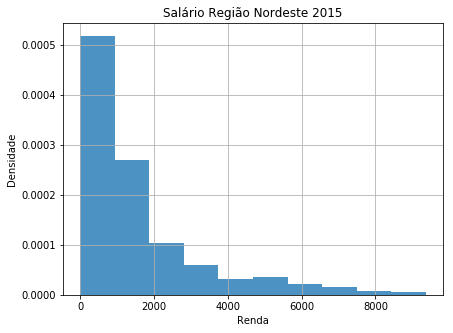

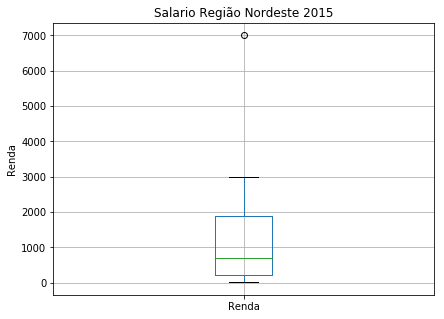

In [65]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Nordeste_2015.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Nordeste 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Nordeste_2015 = Região_Nordeste_2015.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Nordeste_2015.plot(kind="box",grid=True)
plt.title("Salario Região Nordeste 2015")
plt.ylabel("Renda")

plt.show()

2011

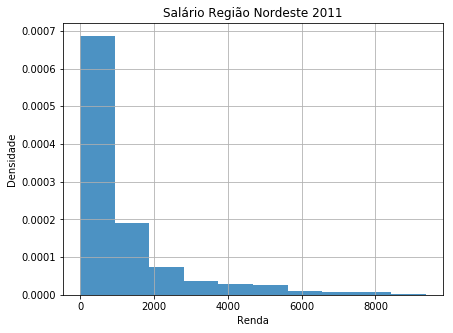

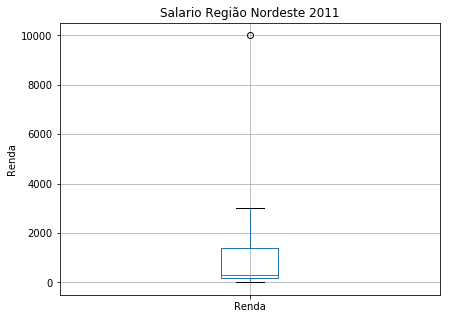

In [66]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Nordeste_2011.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Nordeste 2011")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Nordeste_2011 = Região_Nordeste_2011.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Nordeste_2011.plot(kind="box",grid=True)
plt.title("Salario Região Nordeste 2011")
plt.ylabel("Renda")

plt.show()

O salário mediano na região Nordeste, aumentou entre os anos.

# Região Centroeste:

# Relação da Região Centroeste com o Uso da Internet em algum Local e posse de Telefone móvel celular para uso pessoal

2015

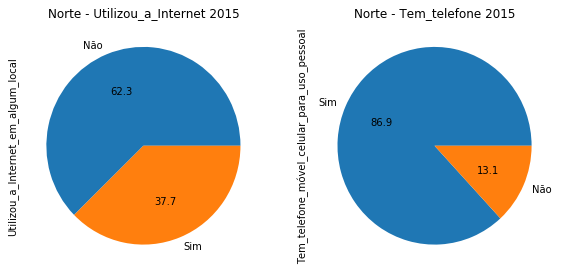

In [67]:
Região_Centroeste_2015=dados_não_nulos[dados_não_nulos.Regiao=="Centroeste"]
Utilizou_a_Internet_em_algum_local_Região_Centroeste= (dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.Regiao=="Centroeste"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Centroeste= (dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.Regiao=="Centroeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Centroeste.plot(kind="pie", autopct="%0.1f",title= 'Norte - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Centroeste.plot(kind="pie",autopct="%0.1f", title= 'Norte - Tem_telefone 2015')

plt.show()

2011

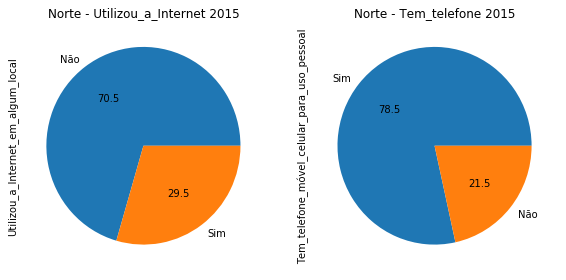

In [68]:
Região_Centroeste_2011=dados_não_nulos_2011[dados_não_nulos_2011.Regiao=="Centroeste"]
Utilizou_a_Internet_em_algum_local_Região_Centroeste_2011= (dados_não_nulos_2011["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos_2011.Regiao=="Centroeste"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Centroeste_2011= (dados_não_nulos_2011["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos_2011.Regiao=="Centroeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Centroeste_2011.plot(kind="pie", autopct="%0.1f",title= 'Norte - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Centroeste_2011.plot(kind="pie",autopct="%0.1f", title= 'Norte - Tem_telefone 2015')

plt.show()

Na região centroeste , tanto o uso de internet em algum local, quanto a posse de telefone , aumentou , entre 2015 e 2011.

# Relação da Região Centroeste com Renda

2015

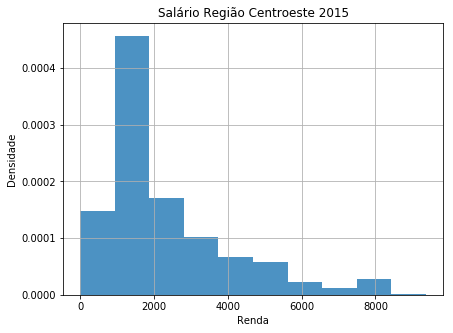

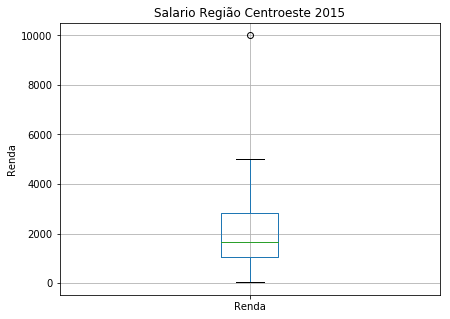

In [69]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Centroeste_2015.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Centroeste 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Centroeste_2015 = Região_Centroeste_2015.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Centroeste_2015.plot(kind="box",grid=True)
plt.title("Salario Região Centroeste 2015")
plt.ylabel("Renda")

plt.show()

2011

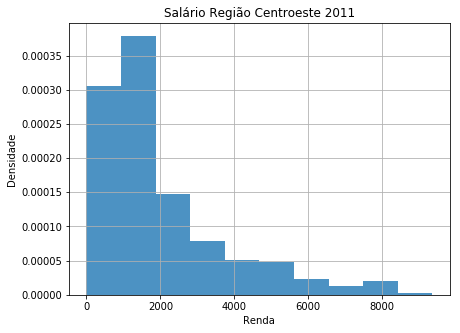

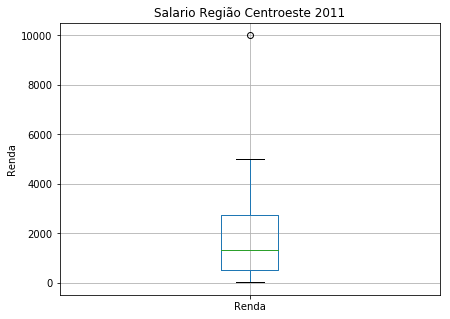

In [70]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Centroeste_2011.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Centroeste 2011")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Centroeste_2011 = Região_Centroeste_2011.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Centroeste_2011.plot(kind="box",grid=True)
plt.title("Salario Região Centroeste 2011")
plt.ylabel("Renda")

plt.show()


O salário mediano na região Centroeste, aumentou entre os anos.

# Região Sul:

# Relação da Região Sul com o Uso da Internet em algum Local e posse de Telefone móvel celular para uso pessoal

2015

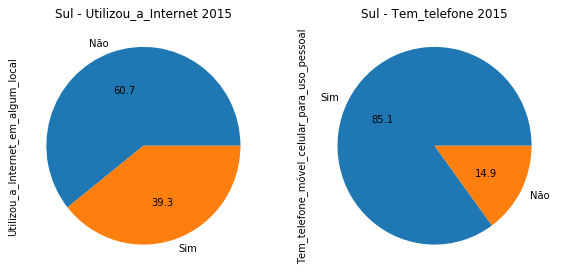

In [71]:
Região_Sul_2015=dados_não_nulos[dados_não_nulos.Regiao=="Sul"]
Utilizou_a_Internet_em_algum_local_Região_Sul= (dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.Regiao=="Sul"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sul= (dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.Regiao=="Sul"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Sul.plot(kind="pie", autopct="%0.1f",title= 'Sul - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sul.plot(kind="pie",autopct="%0.1f", title= 'Sul - Tem_telefone 2015')

plt.show()

2011

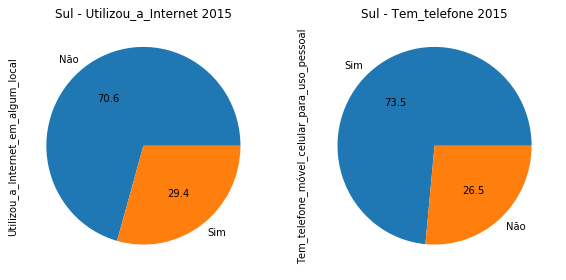

In [72]:
Região_Sul_2011=dados_não_nulos_2011[dados_não_nulos_2011.Regiao=="Sul"]
Utilizou_a_Internet_em_algum_local_Região_Sul_2011= (dados_não_nulos_2011["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos_2011.Regiao=="Sul"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sul_2011= (dados_não_nulos_2011["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos_2011.Regiao=="Sul"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Sul_2011.plot(kind="pie", autopct="%0.1f",title= 'Sul - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sul_2011.plot(kind="pie",autopct="%0.1f", title= 'Sul - Tem_telefone 2015')

plt.show()

Na região sul , tanto o uso de internet em algum local, quanto a posse de telefone , aumentou , entre 2015 e 2011.

# Relação da Região Sul com Renda

2015

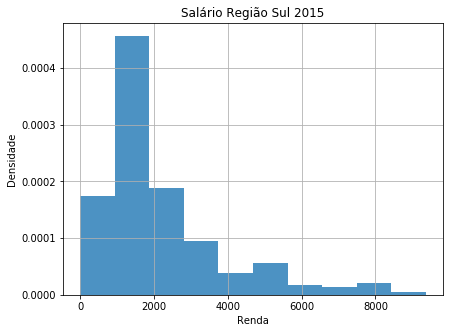

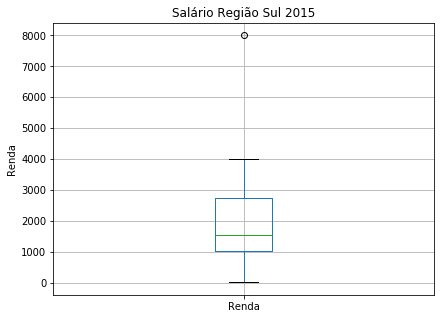

In [73]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Sul_2015.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Sul 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Sul_2015 = Região_Sul_2015.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Sul_2015.plot(kind="box",grid=True)
plt.title("Salário Região Sul 2015")
plt.ylabel("Renda")

plt.show()

2011

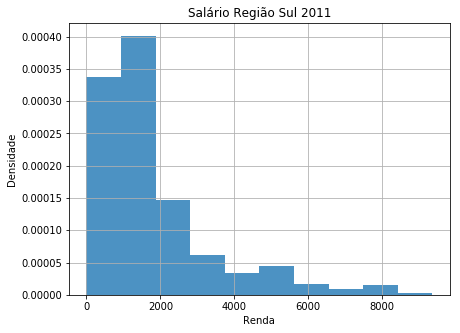

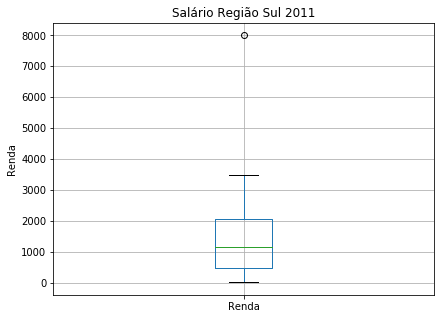

In [74]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Sul_2011.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Sul 2011")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Sul_2011 = Região_Sul_2011.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Sul_2011.plot(kind="box",grid=True)
plt.title("Salário Região Sul 2011")
plt.ylabel("Renda")

plt.show()

O salário mediano na região Sul, aumentou entre os anos.

# Região Sudeste:

# Relação da Região Sudeste com o Uso da Internet em algum Local e posse de Telefone móvel celular para uso pessoal

2015

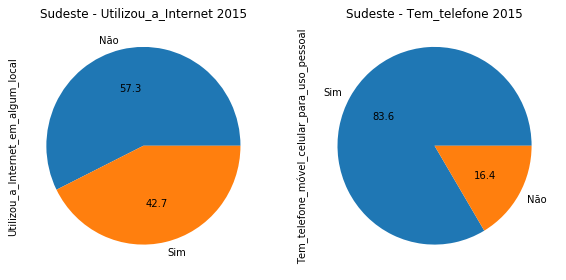

In [75]:
Região_Sudeste_2015=dados_não_nulos[dados_não_nulos.Regiao=="Sudeste"]
Utilizou_a_Internet_em_algum_local_Região_Sudeste= (dados_não_nulos["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos.Regiao=="Sudeste"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sudeste= (dados_não_nulos["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos.Regiao=="Sudeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Sudeste.plot(kind="pie", autopct="%0.1f",title= 'Sudeste - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sudeste.plot(kind="pie",autopct="%0.1f", title= 'Sudeste - Tem_telefone 2015')

plt.show()

2011

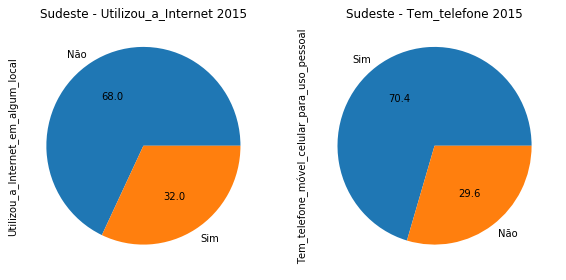

In [76]:
Região_Sudeste_2011=dados_não_nulos_2011[dados_não_nulos_2011.Regiao=="Sudeste"]
Utilizou_a_Internet_em_algum_local_Região_Sudeste_2011= (dados_não_nulos_2011["Utilizou_a_Internet_em_algum_local"])[dados_não_nulos_2011.Regiao=="Sudeste"].value_counts()
Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sudeste_2011= (dados_não_nulos_2011["Tem_telefone_móvel_celular_para_uso_pessoal"])[dados_não_nulos_2011.Regiao=="Sudeste"].value_counts()

fig = plt.figure(figsize=(20,10))

plt.subplot(241)
plot=Utilizou_a_Internet_em_algum_local_Região_Sudeste_2011.plot(kind="pie", autopct="%0.1f",title= 'Sudeste - Utilizou_a_Internet 2015')

plt.subplot(242)
plot=Tem_telefone_móvel_celular_para_uso_pessoal_Região_Sudeste_2011.plot(kind="pie",autopct="%0.1f", title= 'Sudeste - Tem_telefone 2015')

plt.show()

Na região sudeste , tanto o uso de internet em algum local, quanto a posse de telefone , aumentou , entre 2015 e 2011.

# Relação da Região Sudeste com Renda

2015

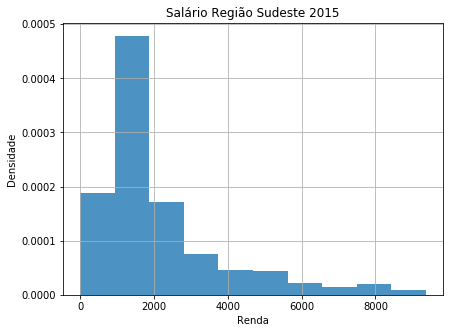

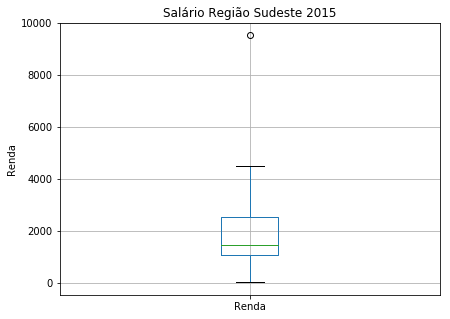

In [77]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Sudeste_2015.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Sudeste 2015")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Sudeste_2015 = Região_Sudeste_2015.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Sudeste_2015.plot(kind="box",grid=True)
plt.title("Salário Região Sudeste 2015")
plt.ylabel("Renda")

plt.show()

2011

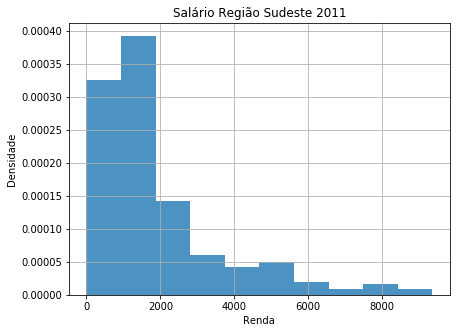

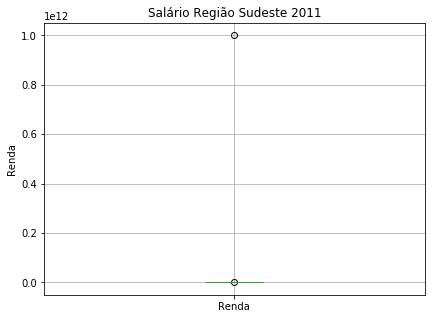

In [79]:
fig = plt.figure(figsize=(15,5))
plt.subplot(121)
plot=Região_Sudeste_2011.Renda.hist(bins=faixa,normed=1,alpha=0.8)
plt.title("Salário Região Sudeste 2011")
plt.ylabel("Densidade")
plt.xlabel("Renda")
plt.show()

Salário_Região_Sudeste_2011 = Região_Sudeste_2011.Renda.quantile(np.arange(0,1,.1))

fig = plt.figure(figsize=(15,5))
plt.subplot(122)
Salário_Região_Sudeste_2011.plot(kind="box",grid=True)
plt.title("Salário Região Sudeste 2011")
plt.ylabel("Renda")

plt.show()



Embora o gráfico Boxplot de 2011 da Região Sudeste não tenha saído , visualmente,  tão bem quanto o de 2015, pode-se verificar que para essa região também há uma mediana de salário maior em 2015 comparado com 2011.

___
## Conclusão 

Descreva aqui suas conclusões!

Conforme analisado, o número de telefones móveis para uso pessoal cresceu entre os anos de 2011 e 2015, além disso, o acesso à Internet, também teve transformação significativa. Cerca de 33,9% de idosos afirmam ter utilizado a internet em alguma região, em 2015, frente a 23,7% , em 2011, isto é, um crescimento de 10,2% nesse acesso. Esse movimento, permite demonstrar uma maior inclusão da amostra no meio digital. Fatores como renda, condição censitária e localidade, puderam aplimorar a análise de efeitos nessa inclusão. Notou-se ao longo do projeto, que a renda teve um impacto positivo no acesso à Internet. 
Portanto, pode-se validar a evolução digital de pessoas com mais de 60 anos, entre tais anos, através desse estudo. Fatores economicamente plausíveis, uma vez que há movimento de expansão no acesso à tecnologia e massificação de celulares.
